# Skills 8: Performance Evaluation of Biometric Systems

# **Nadeer Hasan**

### Install the required libraries

In [ ]:
pip install pandas numpy matplotlib scikit-learn


### The Dataset and Biometric Metrics
 Dataset Overview: Load the dataset and inspect its structure.

      Score    Label
0  0.749671  Genuine
1  0.686174  Genuine
2  0.764769  Genuine
3  0.852303  Genuine
4  0.676585  Genuine
Genuine Scores: Mean = 0.7005, Standard Deviation = 0.0975
Impostor Scores: Mean = 0.3032, Standard Deviation = 0.0978
Label Distribution:
Label
Genuine     500
Impostor    500
Name: count, dtype: int64


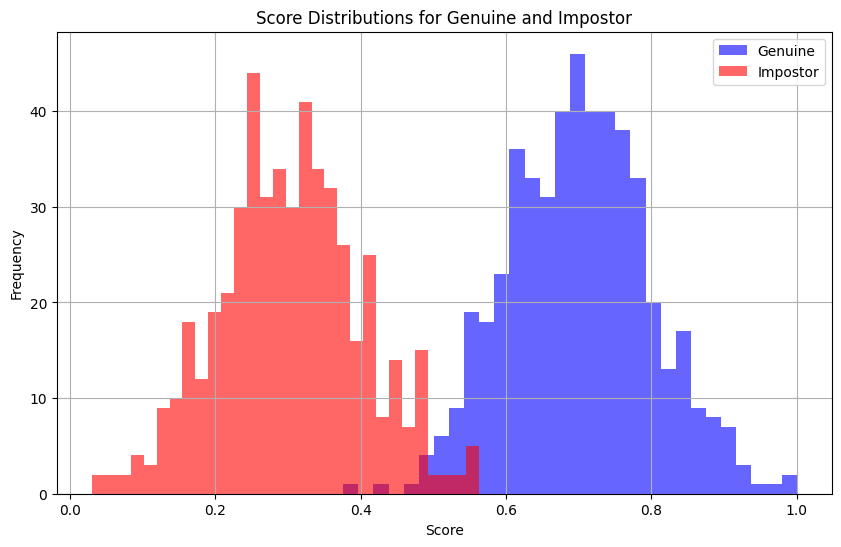

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('Biometric_System_Evaluation_Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Calculate statistics for Genuine and Impostor scores
genuine_scores = data[data['Label'] == 'Genuine']['Score']
genuine_mean = genuine_scores.mean()
genuine_std = genuine_scores.std()

impostor_scores = data[data['Label'] == 'Impostor']['Score']
impostor_mean = impostor_scores.mean()
impostor_std = impostor_scores.std()

print(f"Genuine Scores: Mean = {genuine_mean:.4f}, Standard Deviation = {genuine_std:.4f}")
print(f"Impostor Scores: Mean = {impostor_mean:.4f}, Standard Deviation = {impostor_std:.4f}")

# Normalize scores if they are outside the [0, 1] range
if data['Score'].min() < 0 or data['Score'].max() > 1:
    data['Score'] = (data['Score'] - data['Score'].min()) / (data['Score'].max() - data['Score'].min())

# Verify label distribution and encode binary labels
label_counts = data['Label'].value_counts()
print(f"Label Distribution:\n{label_counts}")

y_true = data['Label'].apply(lambda x: 1 if x == 'Genuine' else 0)
y_scores = data['Score']

# Plot score distributions
genuine_scores = data[data['Label'] == 'Genuine']['Score']
impostor_scores = data[data['Label'] == 'Impostor']['Score']

plt.figure(figsize=(10, 6))
plt.hist(genuine_scores, bins=30, alpha=0.6, label='Genuine', color='blue')
plt.hist(impostor_scores, bins=30, alpha=0.6, label='Impostor', color='red')
plt.title('Score Distributions for Genuine and Impostor')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### ROC Curve Visualization
 In this section, we focus on visualizing the Receiver Operating Characteristic
 (ROC) Curve and calculating the Area Under the Curve (AUC) for the system

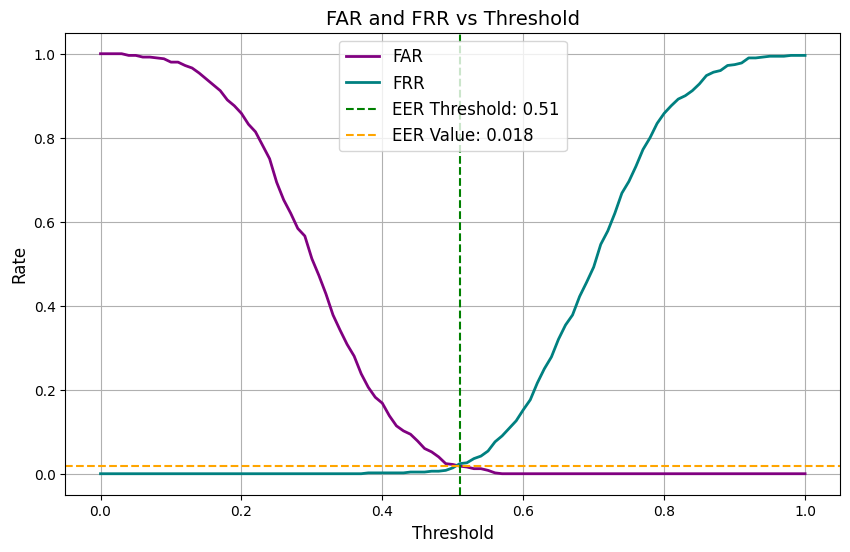

EER occurs at threshold: 0.51, with FAR and FRR both approximately at: 0.018


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define thresholds
thresholds = np.linspace(0, 1, 101)  # Generate thresholds from 0 to 1
far_values = []
frr_values = []

for threshold in thresholds:
    false_accepts = (impostor_scores >= threshold).sum()
    false_rejects = (genuine_scores < threshold).sum()

    far = false_accepts / len(impostor_scores)
    frr = false_rejects / len(genuine_scores)

    far_values.append(far)
    frr_values.append(frr)


abs_diff = np.abs(np.array(far_values) - np.array(frr_values))
eer_index = np.argmin(abs_diff)
eer_threshold = thresholds[eer_index]
eer_value = far_values[eer_index]

# Plot FAR and FRR curves
plt.figure(figsize=(10, 6))


plt.plot(thresholds, far_values, label='FAR', color='purple', linewidth=2)
# Plot FRR with a new color (e.g., teal)
plt.plot(thresholds, frr_values, label='FRR', color='teal', linewidth=2)

plt.axvline(x=eer_threshold, color='green', linestyle='--', label=f'EER Threshold: {eer_threshold:.2f}')
plt.axhline(y=eer_value, color='orange', linestyle='--', label=f'EER Value: {eer_value:.3f}')

# Title and labels
plt.title('FAR and FRR vs Threshold', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)

# Add a legend to differentiate between FAR, FRR, and EER
plt.legend(loc='best', fontsize=12)

# Display grid for better visualization
plt.grid(True)

# Save the figure
plt.savefig('FAR_FRR_Plot.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# Show the plot
plt.show()

# Print EER information
print(f'EER occurs at threshold: {eer_threshold:.2f}, with FAR and FRR both approximately at: {eer_value:.3f}')



### Detection Error Trade-off (DET) Curve


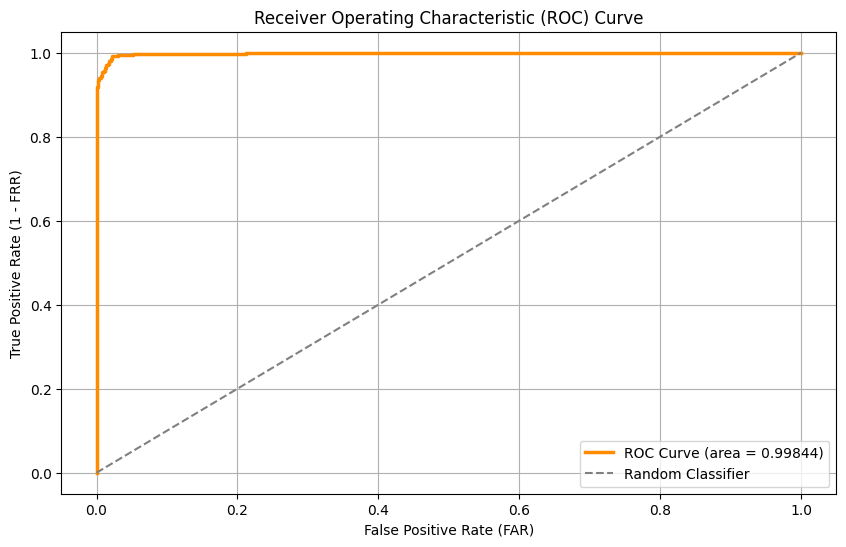

Final AUC: 0.9984


In [ ]:


# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = {:.5f})'.format(roc_auc), linewidth=2.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Random Classifier')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FAR)')
plt.ylabel('True Positive Rate (1 - FRR)')
plt.legend()
plt.grid(True)
plt.show()

# Print Results
print(f"Final AUC: {roc_auc:.4f}")
if roc_auc == 1:
    print("Warning: AUC of 1 indicates perfect separation, which is unusual for real-world biometric systems.")



### plotting of a DET curve using both transformed values

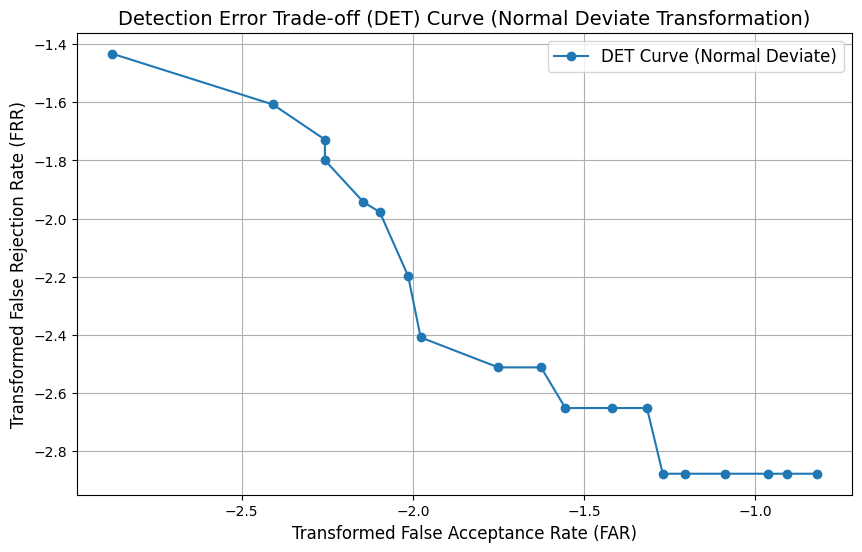

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt


far_transformed = norm.ppf(far_values)
frr_transformed = norm.ppf(frr_values)

# Plot DET Curve using transformed FAR and FRR
plt.figure(figsize=(10, 6))
plt.plot(far_transformed, frr_transformed, marker='o', label='DET Curve (Normal Deviate)')
plt.title('Detection Error Trade-off (DET) Curve (Normal Deviate Transformation)', fontsize=14)
plt.xlabel('Transformed False Acceptance Rate (FAR)', fontsize=12)
plt.ylabel('Transformed False Rejection Rate (FRR)', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()


### The plotting of a DET curve using built-in det_curve function

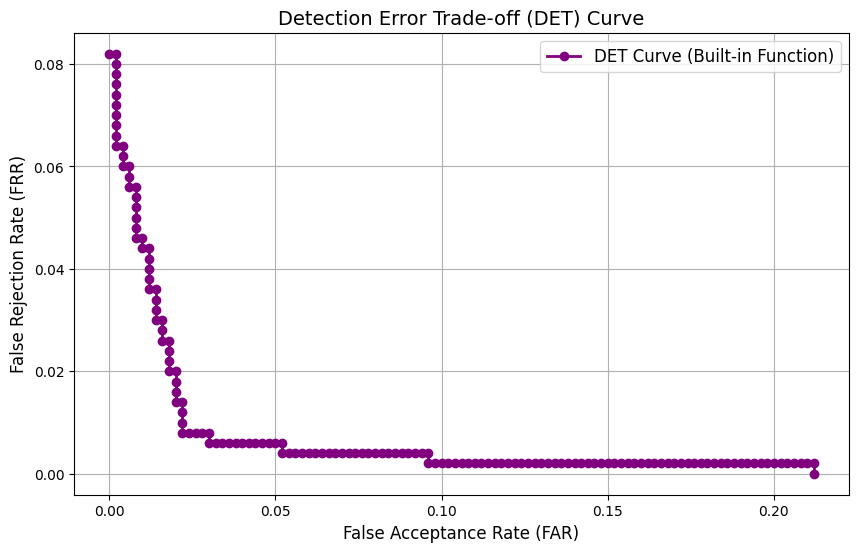

In [ ]:
from sklearn.metrics import det_curve
import matplotlib.pyplot as plt


far, frr, thresholds = det_curve(y_true, y_scores)

# Plot DET Curve
plt.figure(figsize=(10, 6))
plt.plot(far, frr, label='DET Curve (Built-in Function)', color='purple', linewidth=2, marker='o')
plt.title('Detection Error Trade-off (DET) Curve', fontsize=14)
plt.xlabel('False Acceptance Rate (FAR)', fontsize=12)
plt.ylabel('False Rejection Rate (FRR)', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
